# 🛳️ Project 1: Titanic Survival Prediction

![](https://thegrapevinegossip.com/wp-content/uploads/2017/12/Top-Funniest-Titanic-Memes-11.jpg)

## Description and objective

The goal of this notebook is to create a model that predicts which passengers survived the Titanic shipwreck. 

The data is from the kaggle competition that you can find at this [link](https://www.kaggle.com/c/titanic/data). 

This is a supervised classification problem with two classes: positive (survived) and negative (die).

##  📤 Load packages

In [821]:
# linear algebra
import numpy as np 
from numpy.random import shuffle
# data processing
import pandas as pd
# data visualization
import plotly.express as px
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
# Pretty display for notebooks
%matplotlib inline
# ignore annoying warning
import warnings
warnings.filterwarnings("ignore")
# data table display settings
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
# library to work with Regular Expressions
import re
# import supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn import svm, linear_model
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
# import metrics from sklearn
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, permutation_test_score
# scaling and binarization methods
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
# select features according to the k highest scores
from sklearn.feature_selection import SelectKBest
# auxiliar library
from collections import Counter
import time

## 💾 Load data

In [822]:
# Reading the CSV file into a Pandas DataFrame
df = pd.read_csv("data/titanic/train.csv")

##  📊 Exploratory Data Analysis

In [823]:
# Print the first 5 rows of data from the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Variables description

In [824]:
# Existing features
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

* **Survived:** 0 = No, 1 = Yes
* **Pclass:** Ticket clase (1 = 1st, 2 = 2nd, 3 = 3rd)
* **Sex:** male or female
* **Sibsp:** # of siblings / spouses aboard the Titanic
* **Parch:** # of parents / children aboard the Titanic
* **Fare:** Passenger fare
* **Cabin:** Cabin number
* **Embarked:** Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [825]:
print('Dataset shape: {}'.format(df.shape[0]))

Dataset shape: 891


In [826]:
# Looking data format and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [827]:
# Some statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Find missing values

In [828]:
# Checking for the missing values in the dataset
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [829]:
# Checking for the % of missing values
(df.isna().sum()/ len(df) * 100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

We have missing values in the columns: `cabin`, `age` and `embarked`. We will try to fix this later.

### Variables correlation

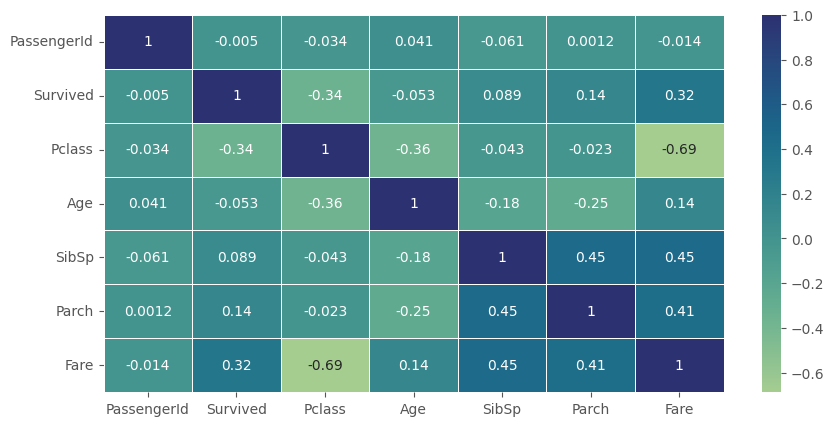

In [830]:
# Plotting the heatmap of the correlation values
cmap = 'crest'
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(df.corr('spearman'), linewidths=.5, cmap=cmap, annot=True);

From the heatmap above, we can see that the features are not highly correlated. The highest correlation is between bSp and Patch with a value of 0.45. So let's continue with all the features.

### Variables distribution

#### Univariate Variable Analysis

##### Categorical variables

* Survided
* Sex
* Embarked

**Survived**

In [831]:
# Define Seaborn color palette to use
palette = 'Set2'
colors = sns.color_palette(palette)[0:10]

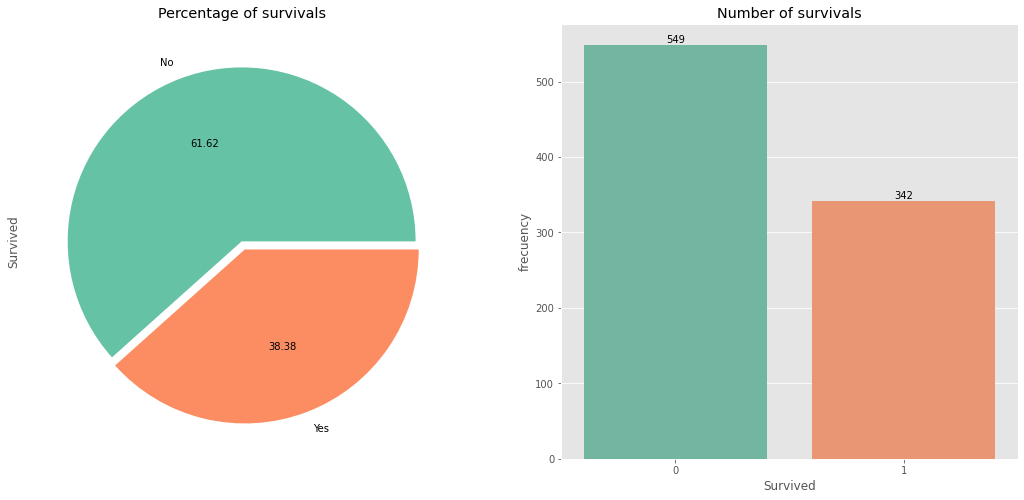

In [832]:
# How many survived?
f, ax = plt.subplots(1,2,figsize=(18, 8))
df.Survived.value_counts().plot(kind='pie', autopct='%.2f', ax=ax[0], explode=[0,0.05], labels=['No', 'Yes'], colors=colors)
ax[0].set_title('Percentage of survivals')
# Distribuition by survivals
sns.countplot(df.Survived, ax=ax[1], palette=palette)
ax[1].set_title('Number of survivals')
ax[1].set_ylabel('frecuency')
for container in ax[1].containers:
    ax[1].bar_label(container);

We can see that the data set is not balanced because we have `38%` positive cases and `62%` negative cases. We will take this into consideration when we need to evaluate our models.

**Sex**

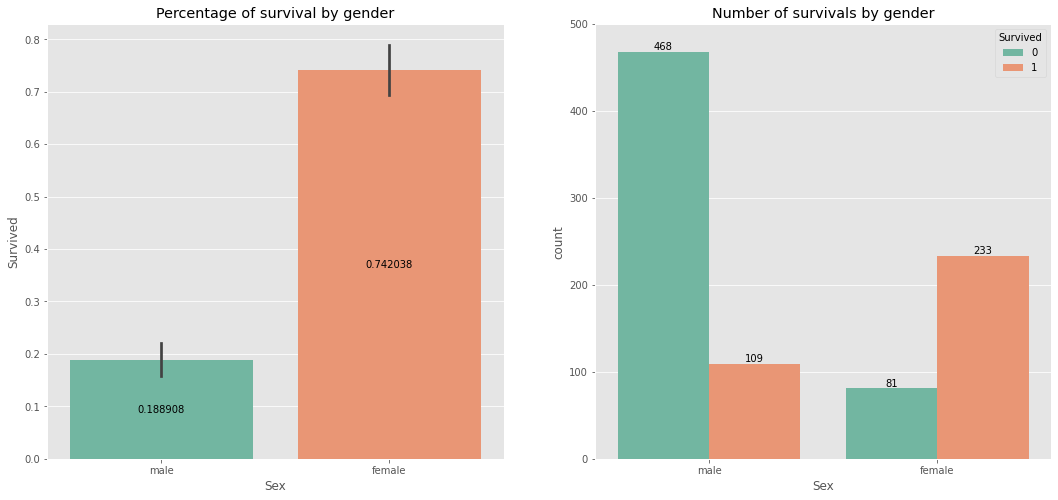

In [833]:
f, ax = plt.subplots(1,2,figsize=(18, 8))
sns.barplot(x='Sex', y='Survived', data=df, ax=ax[0], palette=palette)
ax[0].set_title('Percentage of survival by gender')
ax[0].set_ylabel('Survived')
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='center')
# Distribuition by gender
sns.countplot(x= 'Sex', data=df, hue='Survived', ax=ax[1], palette=palette)
ax[1].set_title('Number of survivals by gender')
ax[1].set_ylim(0,500)
for container in ax[1].containers:
    ax[1].bar_label(container);

74% women on board survived and only 19% men survived, gender becomes a huge factor here.

In [834]:
pd.crosstab(df.Sex, df.Survived, margins=True).style.background_gradient(cmap=cmap)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


**Embarked**

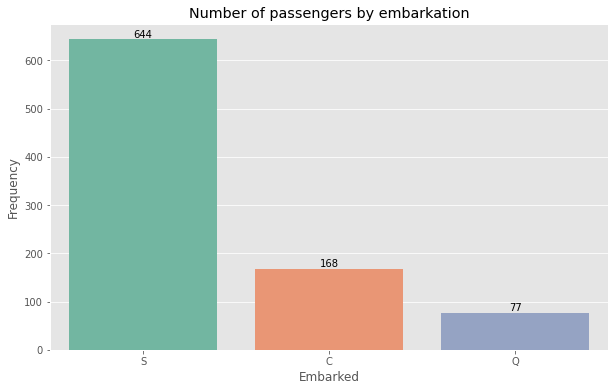

In [835]:
# Distribuition by embarkation
plt.figure(figsize = (10,6))
ax = sns.countplot(df['Embarked'], palette=palette)
plt.ylabel("Frequency")
plt.title("Number of passengers by embarkation")
ax.bar_label(ax.containers[0]);

Most of the passengers boarded through port `S` and the minority through port `Q`.

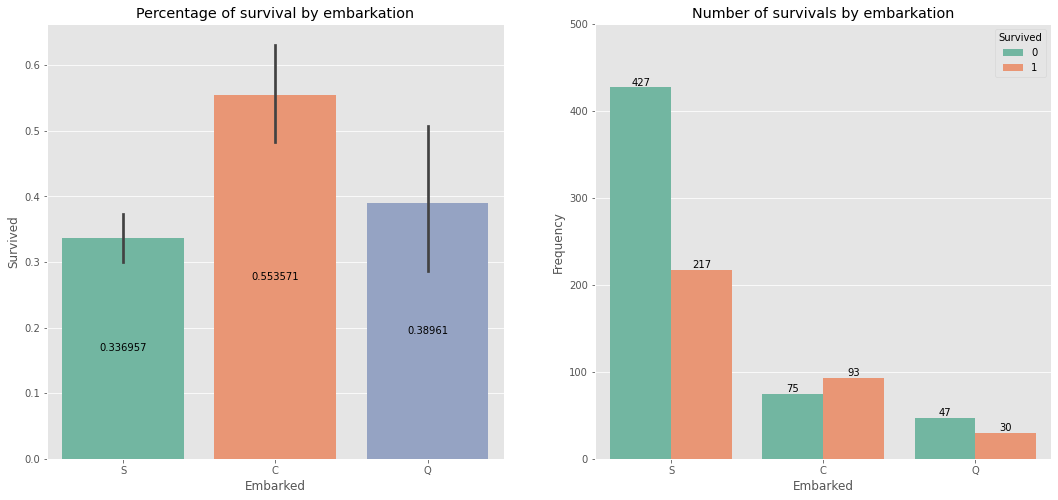

In [836]:
f, ax = plt.subplots(1,2,figsize=(18, 8))
ax[0] = sns.barplot(x='Embarked', y='Survived', data=df, ax=ax[0], palette=palette)
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='center')
ax[0].set_title('Percentage of survival by embarkation')
ax[0].set_ylabel('Survived')
ax[1] = sns.countplot(x= 'Embarked', data=df, hue='Survived', ax=ax[1], palette=palette)
ax[1].set_title('Number of survivals by embarkation')
ax[1].set_ylabel('Frequency')
ax[1].set_ylim(0,500)
for container in ax[1].containers:
    ax[1].bar_label(container);

Passengers embarked in the port `S` had the lowest survival rate and those embarked in `C` the highest.

In [837]:
pd.crosstab(df.Embarked, df.Survived, margins=True).style.background_gradient(cmap=cmap)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


##### Ordinal variable

* Passenger class

**Passenger class**

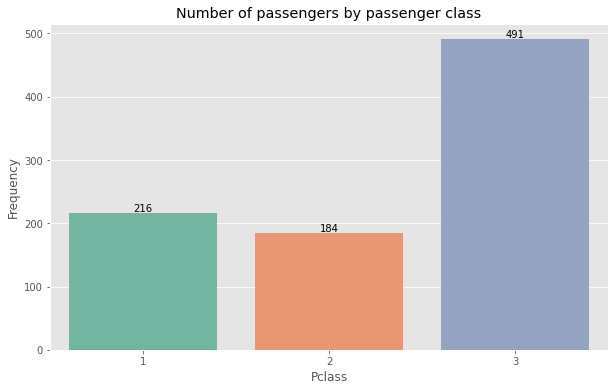

In [838]:
# Distribuition by passenger class
plt.figure(figsize = (10,6))
ax = sns.countplot(df['Pclass'], palette=palette)
plt.ylabel("Frequency")
plt.title("Number of passengers by passenger class")
ax.bar_label(ax.containers[0]);

Most of the passengers were in class 3 and the minority in class 2.

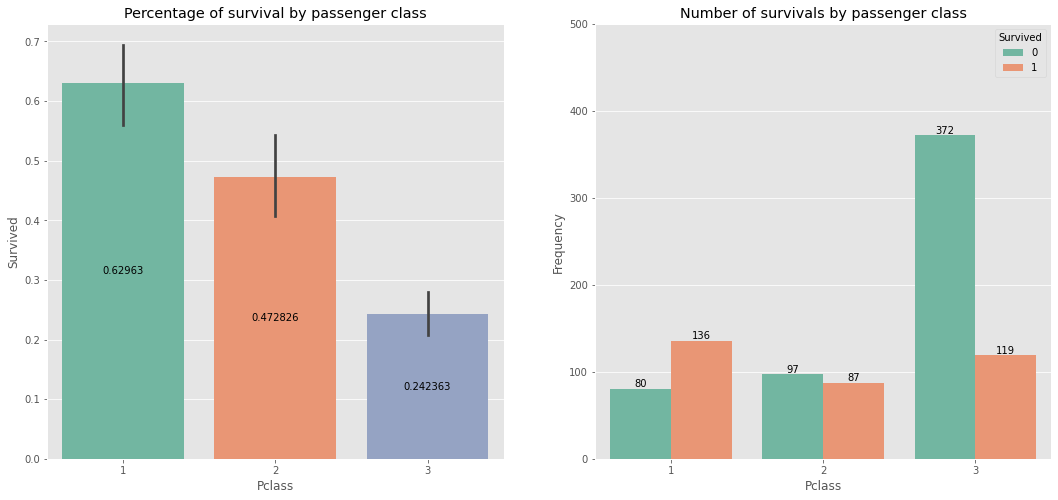

In [839]:
f, ax = plt.subplots(1,2,figsize=(18, 8))
sns.barplot(x='Pclass', y='Survived', data=df, ax=ax[0], palette=palette)
ax[0].set_title('Percentage of survival by passenger class')
ax[0].set_ylabel('Survived')
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='center')
sns.countplot(x= 'Pclass', data=df, hue='Survived', ax=ax[1], palette=palette)
ax[1].set_title('Number of survivals by passenger class')
ax[1].set_ylabel('Frequency')
ax[1].set_ylim(0,500)
for container in ax[1].containers:
    ax[1].bar_label(container);

This graph tells us that about 63% of the 1st class passengers survived, 47% of the 2nd class passengers survived, and 24% of the 3rd class passengers survived. Here we see that the class is contributing to a person's probability of survival, especially if this person is in Class 1.

In [840]:
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(cmap=cmap)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


##### Discrete variables

**Siblings & Spouses** 

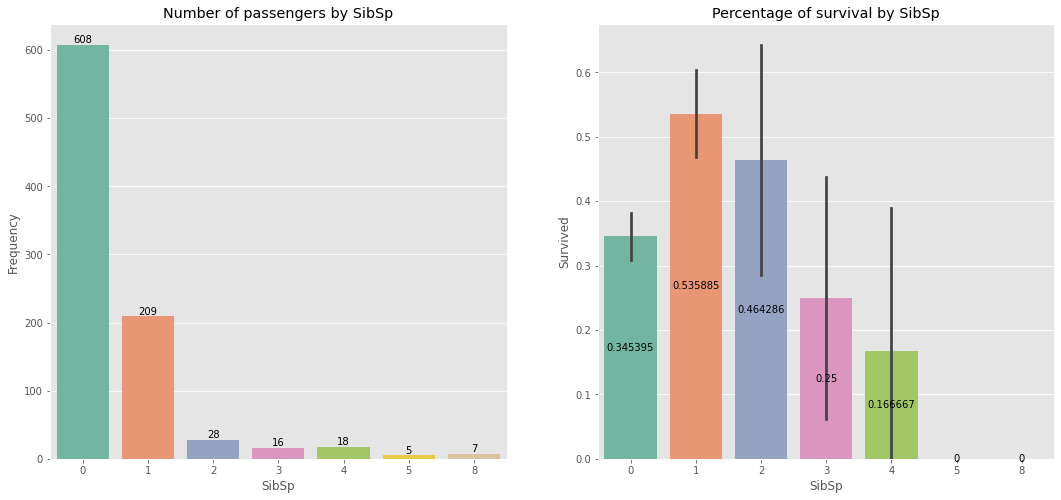

In [841]:
f, ax = plt.subplots(1,2,figsize=(18, 8))
# Distribuition by SibSp
sns.countplot(x= 'SibSp', data=df, ax=ax[0], palette=palette)
ax[0].set_ylabel('Frequency')
ax[0].set_title('Number of passengers by SibSp')
ax[0].bar_label(ax[0].containers[0])
sns.barplot(x='SibSp', y='Survived', data=df, ax=ax[1], palette=palette)
ax[1].set_title('Percentage of survival by SibSp')
ax[1].set_ylabel('Survived')
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center');

**Parch** 

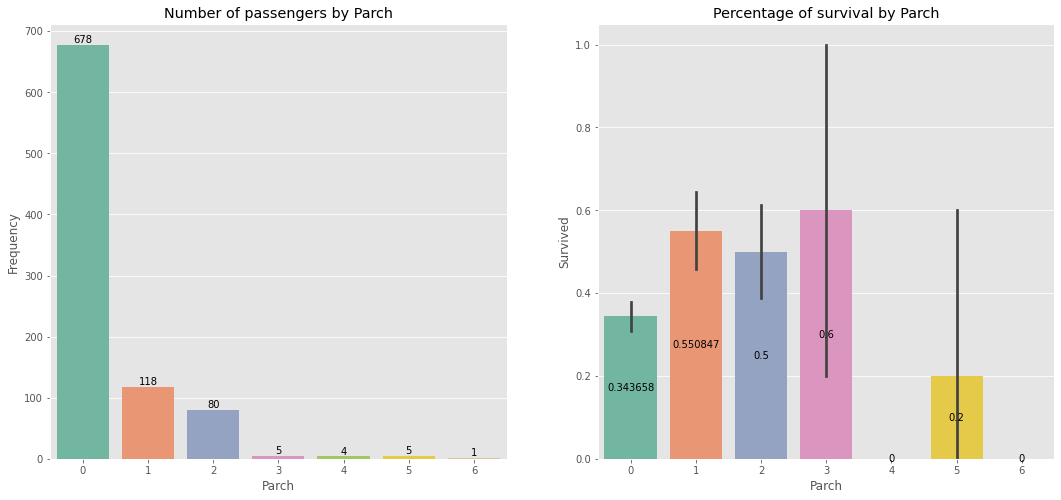

In [842]:
f, ax = plt.subplots(1,2,figsize=(18, 8))
# # Distribuition by parch
sns.countplot(x= 'Parch', data=df, ax=ax[0], palette=palette)
ax[0].set_ylabel('Frequency')
ax[0].set_title('Number of passengers by Parch')
ax[0].bar_label(ax[0].containers[0])
sns.barplot(x='Parch', y='Survived', data=df, ax=ax[1], palette=palette)
ax[1].set_title('Percentage of survival by Parch')
ax[1].set_ylabel('Survived')
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center');

Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

**Ticket**

In [843]:
len(df.Ticket.unique())

681

In [844]:
df.Ticket.unique()[:10]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736'], dtype=object)

##### Continuous variables

**Age**

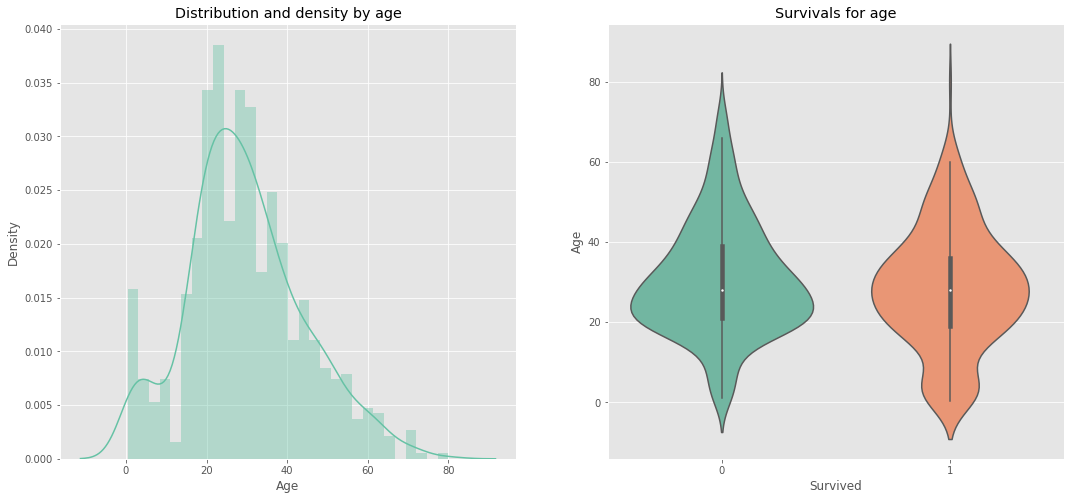

In [845]:
f, ax = plt.subplots(1,2,figsize=(18, 8))
# # Distribuition by age
sns.distplot(df['Age'], bins=30, ax=ax[0], color=sns.color_palette('Set2')[0])
ax[0].set_ylabel("Density")
ax[0].set_title("Distribution and density by age")
sns.violinplot(x="Survived", y = 'Age', data=df, ax=ax[1], palette=palette)
ax[1].set_title('Survivals for age')
ax[1].set_ylabel('Age');

**Fare**

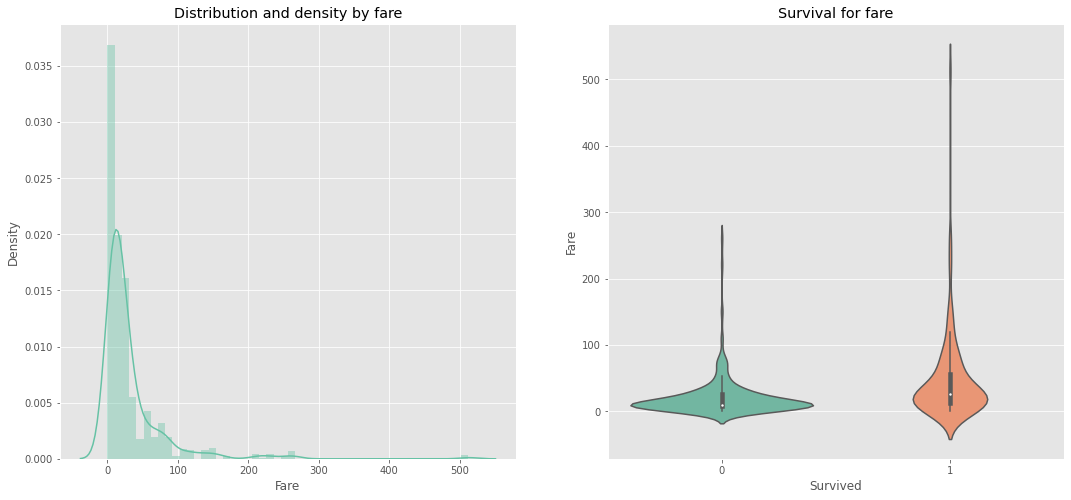

In [846]:
f, ax = plt.subplots(1,2,figsize=(18, 8))
# # Distribuition by fare
sns.distplot(df['Fare'], bins=50, ax=ax[0], color=sns.color_palette('Set2')[0])
ax[0].set_ylabel("Density")
ax[0].set_title("Distribution and density by fare")
sns.violinplot(x="Survived", y = 'Fare', data=df, ax=ax[1], palette=palette)
ax[1].set_title('Survival for fare')
ax[1].set_ylabel('Fare');

#### Bivariate analysis

**Sex & Passenger class**

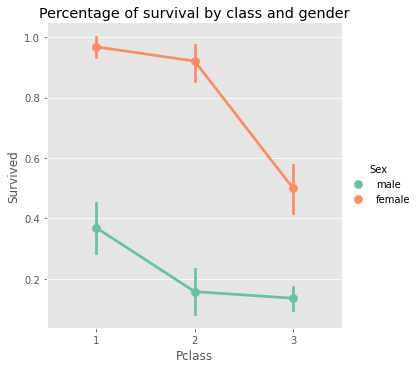

In [847]:
sns.factorplot(x='Pclass', y='Survived', hue= 'Sex', data= df, ax=ax[0], palette=colors)
plt.title('Percentage of survival by class and gender');

Note that, although class 1 has a better chance of survival than any of the others, the male gender corresponding to the upper class has less chance of survival than the women corresponding to the lower class.

**Sex & Embarked**

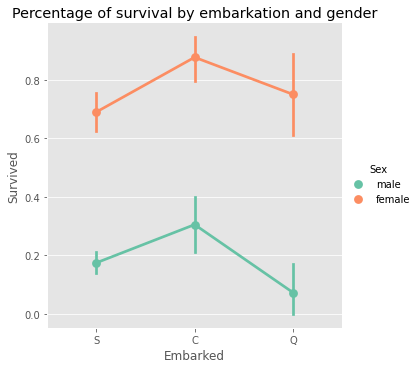

In [848]:
sns.factorplot(x='Embarked', y='Survived', hue='Sex', data=df, ax=ax[1], palette=palette)
plt.title('Percentage of survival by embarkation and gender');

**Pclass, Sex & Embarked**

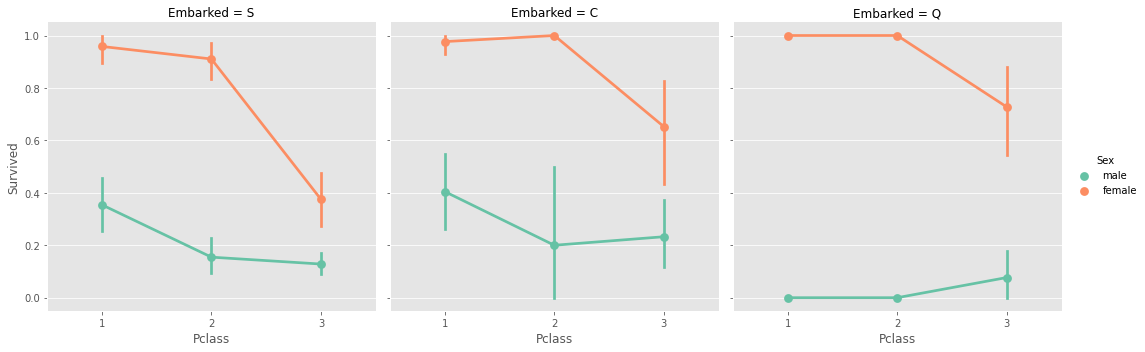

In [849]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=df, palette=palette);

**Pclass, Sex & Fare**

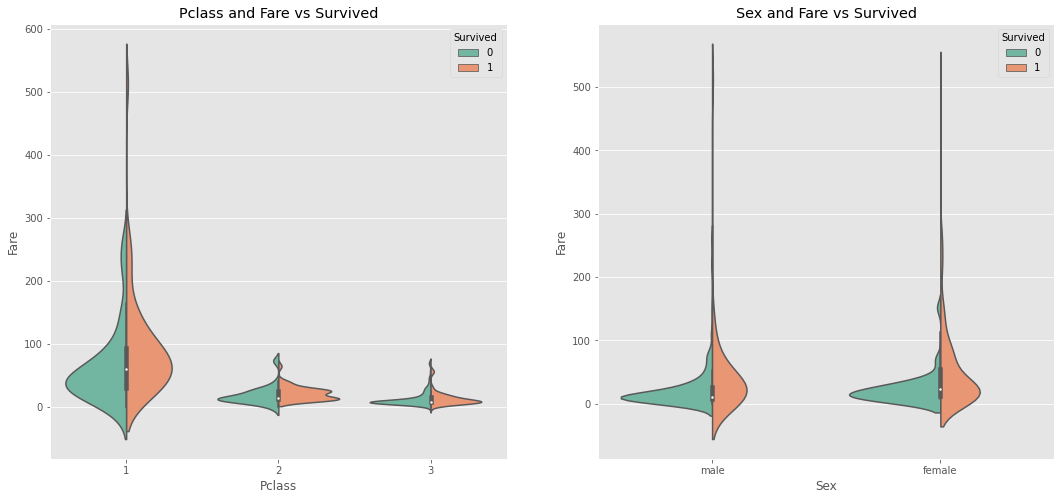

In [850]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Fare", hue="Survived", data=df,split=True,ax=ax[0], palette=palette)
ax[0].set_title('Pclass and Fare vs Survived')
sns.violinplot("Sex","Fare", hue="Survived", data=df,split=True,ax=ax[1], palette=palette)
ax[1].set_title('Sex and Fare vs Survived');

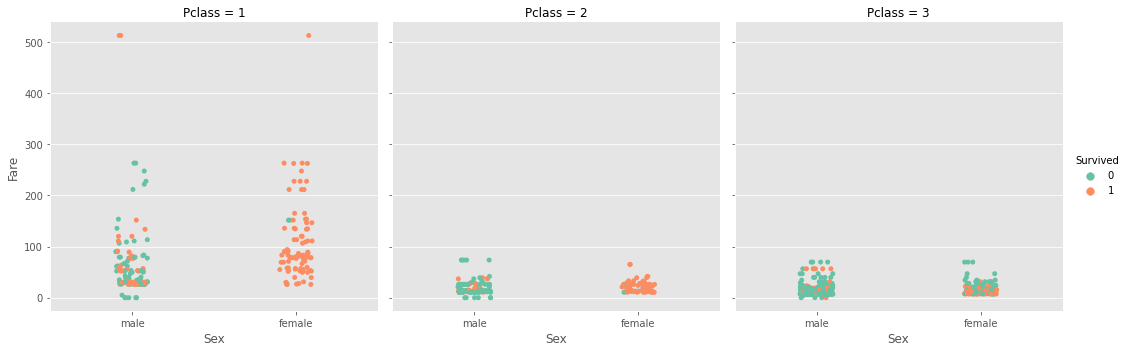

In [851]:
sns.catplot(x="Sex", y="Fare", hue="Survived", col="Pclass", data=df, palette=palette);

**Pclass, Sex & Age**

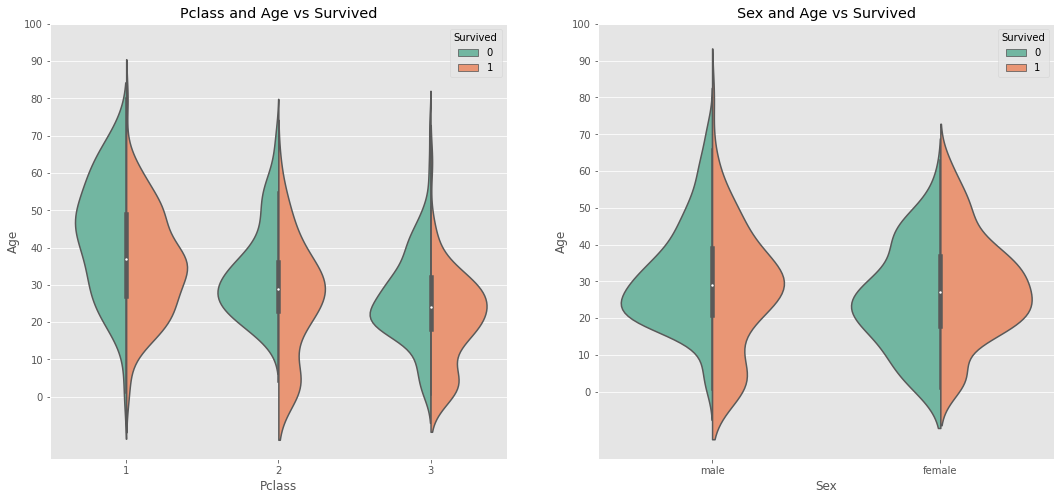

In [852]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df,split=True,ax=ax[0], palette=palette)
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df,split=True,ax=ax[1], palette=palette)
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10));

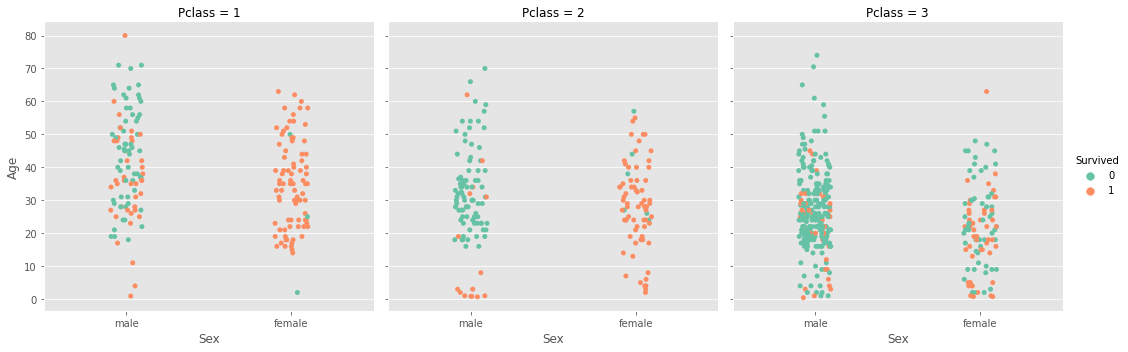

In [853]:
sns.catplot(x="Sex", y="Age", hue="Survived", col="Pclass", data=df, palette=palette);

**Age & Fare**

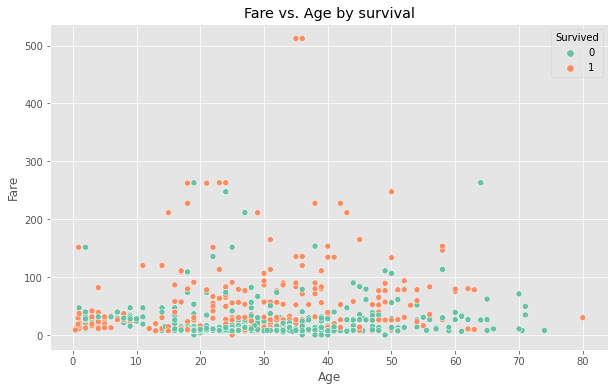

In [854]:
plt.figure(figsize = (10,6))
ax = sns.scatterplot(x='Age',y="Fare",data=df, hue="Survived", palette=palette)
#ax.set_ylim(0,300)
plt.title("Fare vs. Age by survival");

## 🧹 Outliers detection

In [855]:
def remove_outliers(dataset, column_name):

    interesting_col = dataset[column_name]
    q1 = interesting_col.quantile(0.25)
    q3 = interesting_col.quantile(0.75)
    IQR = q3 - q1
    min_value = q1 - (IQR * 1.5)
    max_value = q3 + (IQR * 1.5)
    mask_outliers = (interesting_col > min_value) & (interesting_col < max_value)
    
    return dataset[mask_outliers]

In [856]:
df.shape

(891, 12)

In [857]:
df.groupby(['Pclass']).apply(lambda x: remove_outliers(x, 'Fare')).reset_index(drop=True).shape

(812, 12)

We decide not to remove the outliers.

## ⚒️ Feature Engineering & Data Cleaning

### Handle missing values

**Cabin**: As 687 values are missing from Cabin, its better to drop the column, as this feature would not help us more, in this case.

In [858]:
del df['Cabin']

**Embarked:** There are 2 missing values from this feature.

In [859]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [860]:
df[(df.Ticket == '113572') | (df.Fare == 80)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


Unfortunately, we do not have any other passenger with similar ticket or fare, and as we are unable to find any specific trend with this 2 passengers from other feature info, we will fill the values with the mode, which is `S` Southampton in this case.

In [861]:
df.Embarked = df.Embarked.fillna(df.Embarked.value_counts().idxmax())

**Age:**

In [862]:
df.Name.head()

0                                Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Thayer)
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
Name: Name, dtype: object

In [863]:
df['title'] = df.Name.apply(lambda x: re.search('([A-Z][a-z]+)\.', x).group(1))

In [864]:
df['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [865]:
pd.crosstab(df.title, df.Sex).T.style.background_gradient(cmap=cmap)

title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [866]:
# Group some titles 
title_dict = {
        "Capt": "Officer",
        "Col": "Officer",
        "Major": "Officer",
        "Dr": "Officer",
        "Rev": "Officer",
        "Jonkheer": "Royalty",
        "Don": "Royalty",
        "Sir": "Royalty",
        "Countess": "Royalty",
        "Dona": "Royalty",
        "Lady": "Royalty",
        "Mme": "Mrs",
        "Ms": "Mrs",
        "Mrs": "Mrs",
        "Mlle": "Miss",
        "Miss": "Miss",
        "Mr": "Mr",
        "Master": "Master"
                   }
# Map each title to correct category   
df['title'] = df.title.map(title_dict)

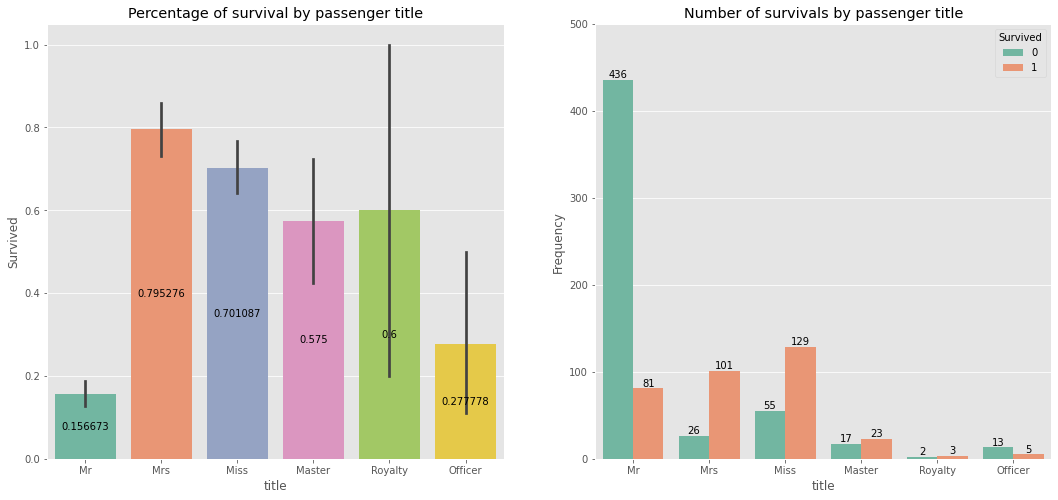

In [867]:
f, ax = plt.subplots(1,2,figsize=(18, 8))
sns.barplot(x='title', y='Survived', data=df, ax=ax[0], palette=palette)
ax[0].set_title('Percentage of survival by passenger title')
ax[0].set_ylabel('Survived')
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='center')
sns.countplot(x= 'title', data=df, hue='Survived', ax=ax[1], palette=palette)
ax[1].set_title('Number of survivals by passenger title')
ax[1].set_ylabel('Frequency')
ax[1].set_ylim(0,500)
for container in ax[1].containers:
    ax[1].bar_label(container);

In [868]:
df.groupby(['title', 'Sex', 'Pclass'])['Age'].median().reset_index()

,title,Sex,Pclass,Age
0,Master,male,1,4.0
1,Master,male,2,1.0
2,Master,male,3,4.0
3,Miss,female,1,30.0
4,Miss,female,2,24.0
5,Miss,female,3,18.0
6,Mr,male,1,40.0
7,Mr,male,2,31.0
8,Mr,male,3,26.0
9,Mrs,female,1,40.0


In [869]:
# Imputing the values on Age NaN's 
df.loc[df.Age.isnull(), 'Age'] = df.groupby(['Sex','Pclass','title']).Age.transform('median')

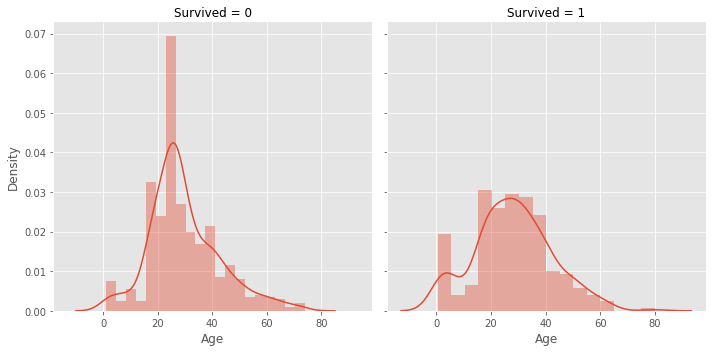

In [870]:
# Ploting the Age Distribuition after the transformation in our dataset
sns.FacetGrid(df, col='Survived', size=5, palette=palette).map(sns.distplot, "Age");

In [871]:
# Check that we don't have missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
title          0
dtype: int64

### Adding new attributes

#### Age segment

In [872]:
df.Age.describe()

count    891.000000
mean      29.138238
std       13.495175
min        0.420000
25%       21.000000
50%       26.000000
75%       36.750000
max       80.000000
Name: Age, dtype: float64

In [873]:
def to_categorical(column, bin_size=5, min_cut=0, max_cut=80):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))

In [874]:
df['age_segment'] = to_categorical(df.Age)

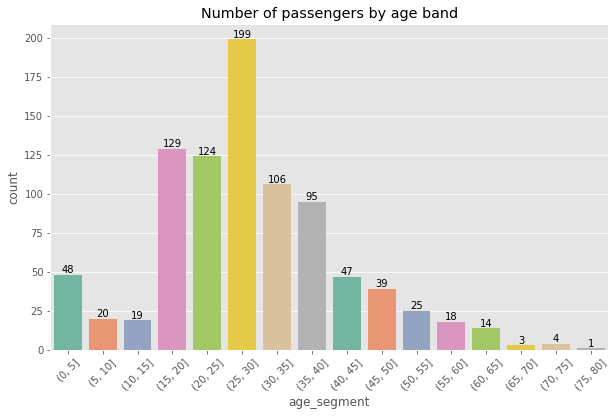

In [875]:
plt.figure(figsize=(10,6))
ax = sns.countplot(df.age_segment, palette=palette)
plt.xticks(rotation=45)
plt.title('Number of passengers by age band')
for container in ax.containers:
    ax.bar_label(container);

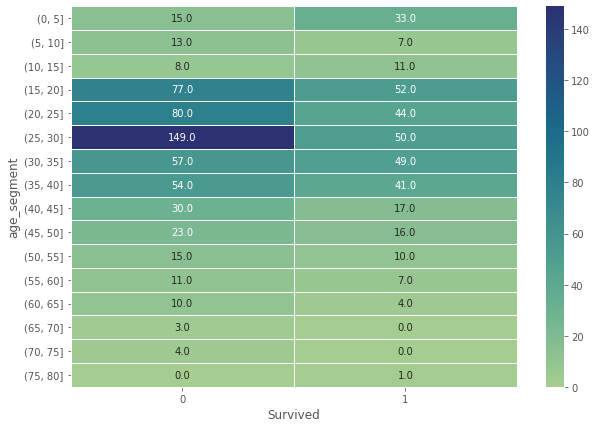

In [876]:
plt.figure(figsize=(10,7))
exp = pd.crosstab(df['age_segment'], df['Survived'])
ax = sns.heatmap(exp, annot = True, fmt = '.1f', cmap=cmap, linewidth=1)
bottom, top = ax.get_ylim()
plt.yticks(rotation=0)
ax.set_ylim(bottom, top)
plt.title('')
sns.despine()

#### Fare segment

In [877]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [878]:
df['fare_segment'] = pd.qcut(df['Fare'], 3)

In [879]:
df.fare_segment.value_counts()

(-0.001, 8.662]    308
(26.0, 512.329]    295
(8.662, 26.0]      288
Name: fare_segment, dtype: int64

In [880]:
pd.crosstab(df['fare_segment'], df['Survived']).style.background_gradient(cmap=cmap)

Survived,0,1
fare_segment,,
"(-0.001, 8.662]",247,61
"(8.662, 26.0]",172,116
"(26.0, 512.329]",130,165


#### Relatives

In [881]:
# Combining the Parch and SibSp to see if we can find a better correlation
df['relatives'] = df['Parch'] + df['SibSp']

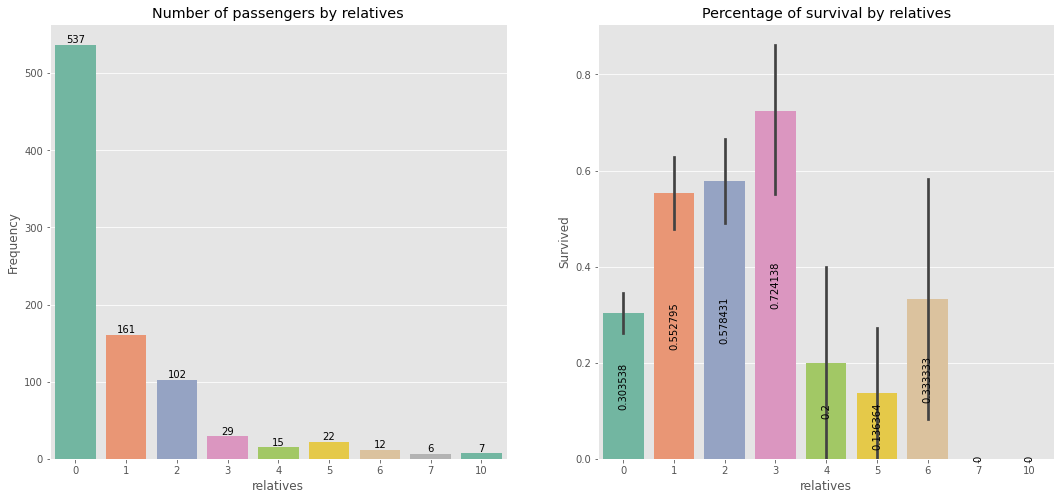

In [882]:
f, ax = plt.subplots(1,2,figsize=(18, 8))
sns.countplot(x= 'relatives', data=df, ax=ax[0], palette=palette)
ax[0].set_ylabel("Frequency")
ax[0].set_title("Number of passengers by relatives")
ax[0].bar_label(ax[0].containers[0])
sns.barplot(x='relatives', y='Survived', data=df, ax=ax[1], palette=palette)
ax[1].set_title('Percentage of survival by relatives')
ax[1].set_ylabel("Survived")
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center', rotation = 90);

#### Alone

In [883]:
df['Alone'] = np.where(df.relatives == 0, 1, 0)

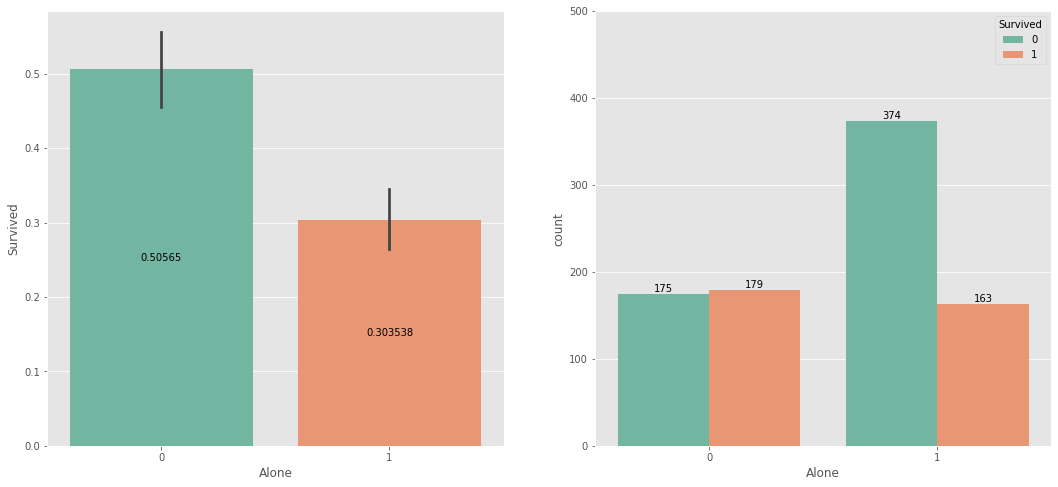

In [884]:
f, ax = plt.subplots(1,2,figsize=(18, 8))
sns.barplot(x='Alone', y='Survived', data=df, ax=ax[0], palette=palette)
ax[0].set_ylabel("Survived")
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='center')
sns.countplot(x= 'Alone', data=df, hue='Survived', ax=ax[1], palette=palette)
ax[1].set_ylim(0,500)
for container in ax[1].containers:
    ax[1].bar_label(container);

#### Name length

In [885]:
df['NameLen'] = df.Name.apply(lambda x : len(x)) 

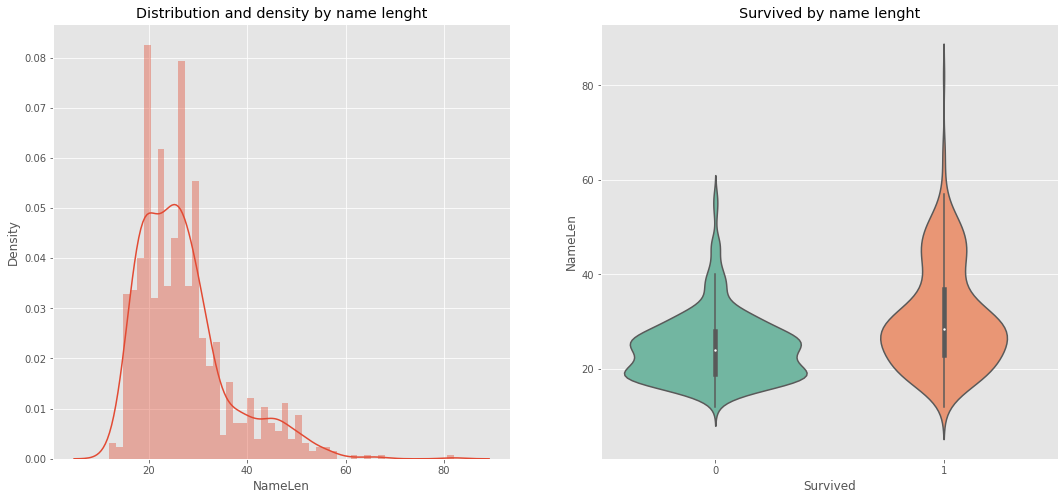

In [886]:
f, ax = plt.subplots(1,2,figsize=(18, 8))
sns.distplot(df['NameLen'], bins=50, ax=ax[0])
ax[0].set_ylabel("Density")
ax[0].set_title("Distribution and density by name lenght")
sns.violinplot(x="Survived", y = 'NameLen', data=df, ax=ax[1], palette=palette)
ax[1].set_title('Survived by name lenght')
ax[1].set_ylabel('NameLen');

### Converting String Values into Numeric

Since we can't pass strings to a machine learning model, we need to convert features like `Sex`, `Embarked` into numeric values.

In [887]:
df['Sex'].replace(['male','female'], [0,1], inplace=True)

In [888]:
df.age_segment = LabelEncoder().fit_transform(df['age_segment'].astype(str))
df.fare_segment = LabelEncoder().fit_transform(df['fare_segment'].astype(str))

In [889]:
def ohe(column):
    
    le = LabelEncoder()
    integer_encoded = le.fit_transform(column)
    ohe = OneHotEncoder(sparse = False)
    integer_encoded = integer_encoded.reshape (len(integer_encoded), 1)
    one_hot_encoded = ohe.fit_transform(integer_encoded)
    categoricals_df = pd.DataFrame(one_hot_encoded)
    categoricals_df.columns = list(le.classes_)
    categoricals_df = categoricals_df.set_index(df.index)
    
    return categoricals_df

In [890]:
embarked_ohe = ohe(df['Embarked'])
title_ohe = ohe(df['title'])

In [891]:
df = pd.concat([df, embarked_ohe, title_ohe], axis=1)

In [892]:
# Print the first 5 rows the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,age_segment,fare_segment,relatives,Alone,NameLen,C,Q,S,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Mr,3,0,1,0,23,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38.0,1,0,PC 17599,71.2833,C,Mrs,6,1,1,0,51,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,4,0,0,1,22,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Mrs,5,1,1,0,44,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Mr,5,0,0,1,24,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Dropping unneeded features

In [893]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'title', 'age_segment',
       'fare_segment', 'relatives', 'Alone', 'NameLen', 'C', 'Q', 'S',
       'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty'],
      dtype='object')

In [894]:
df.drop(['Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'title', 'Name','Ticket','PassengerId'], axis=1, inplace=True)

In [895]:
df.head()

,Survived,Pclass,Sex,age_segment,fare_segment,relatives,Alone,NameLen,C,Q,S,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,3,0,3,0,1,0,23,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,1,6,1,1,0,51,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3,1,4,0,0,1,22,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1,1,5,1,1,0,44,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,3,0,5,0,0,1,24,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [896]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    int64  
 3   age_segment   891 non-null    int64  
 4   fare_segment  891 non-null    int64  
 5   relatives     891 non-null    int64  
 6   Alone         891 non-null    int64  
 7   NameLen       891 non-null    int64  
 8   C             891 non-null    float64
 9   Q             891 non-null    float64
 10  S             891 non-null    float64
 11  Master        891 non-null    float64
 12  Miss          891 non-null    float64
 13  Mr            891 non-null    float64
 14  Mrs           891 non-null    float64
 15  Officer       891 non-null    float64
 16  Royalty       891 non-null    float64
dtypes: float64(9), int64(8)
memory usage: 118.5 KB


### Correlation between variables

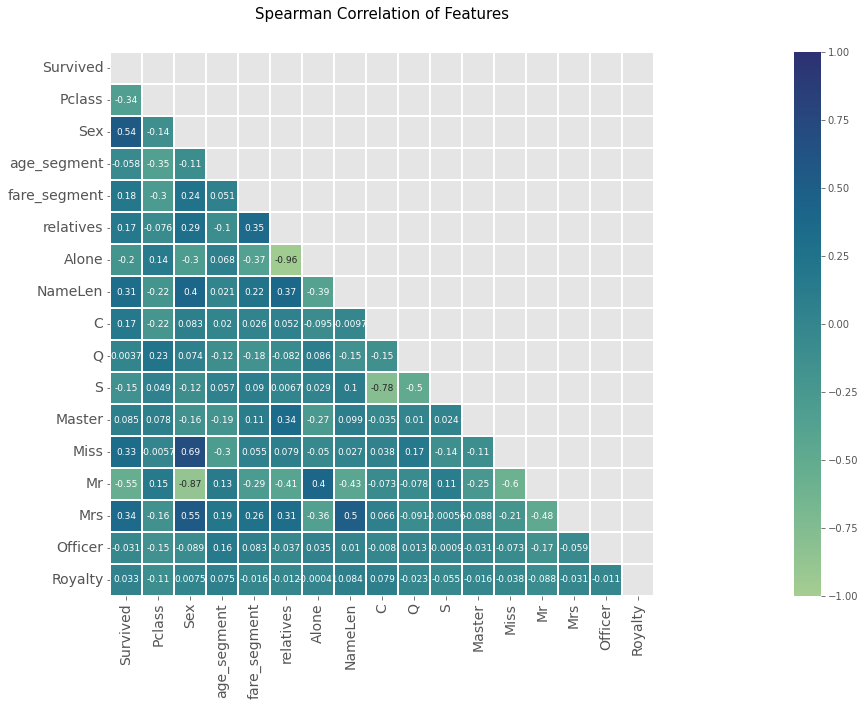

In [960]:
plt.figure(figsize=(50, 10))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr('spearman'), vmin=-1, annot=True, mask=mask, cmap=cmap, linewidths=0.1, vmax=1.0, square=True, annot_kws={'size': 9})
fig.set_size_inches(18,15)
plt.title('Spearman Correlation of Features', y=1.05, size=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

### Split X & y

In [898]:
# Separate features and label 
y = df.Survived 
X = df.drop('Survived', axis = 1)

### PCA (Principle component analysis)

Let’s visualize our final dataset by implementing PCA and plot the graph.

In [899]:
# Run The PCA
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100

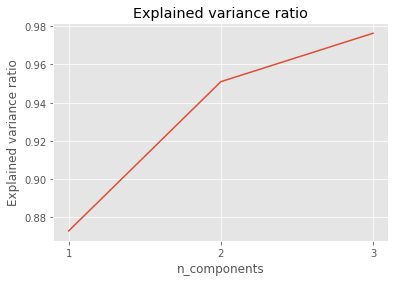

In [900]:
evr = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(evr)+1),evr)
plt.xticks(range(1,len(evr)+1))
plt.title("Explained variance ratio")
plt.ylabel("Explained variance ratio")
plt.xlabel("n_components")
plt.show()

In [901]:
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ["pc1","pc2","pc3"]
X_pca["y"] = y

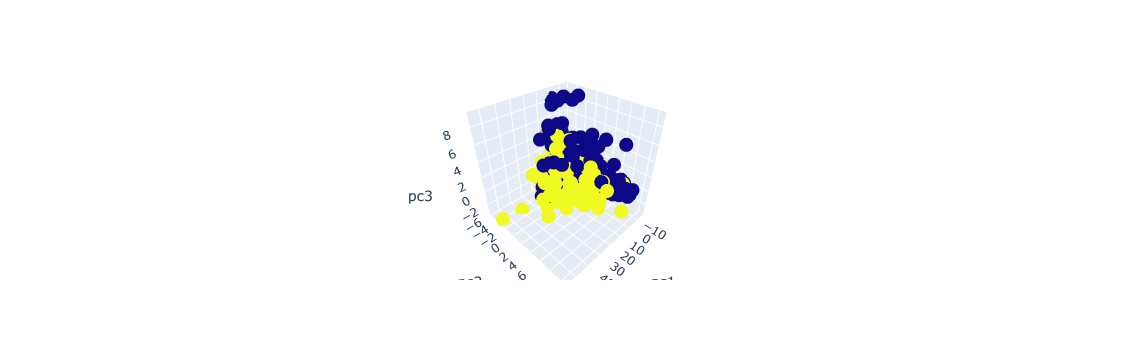

In [902]:
# plot the clusters in color
fig = px.scatter_3d(X_pca, x='pc1', y='pc2', z='pc3', color=y)
fig.update_traces(marker_coloraxis=None)
fig.show()

### Split train & test

In [903]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

### Scaling

In [904]:
# Feature Scaling
scaler = MinMaxScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train)

scaler = MinMaxScaler() 
scaler.fit(X_test) 
X_test = scaler.transform(X_test)

## Predictive modeling

Following are the algorithms we will use to make the model:

* [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [K-Nearest Neighbours](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
* [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
* [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
* [Multilyer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
* [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

### Benchmark: Simple Logistic Regression

Let's first look at logistic regression.

In [905]:
regLog = LogisticRegression() 
regLog.fit(X_train, y_train) 

print('----Training----')
proba_train = regLog.predict_proba(X_train)  
y_pred_train = regLog.predict(X_train)
bal_acc_train = round(balanced_accuracy_score(y_train, y_pred_train), 4)
f1_train = round(f1_score(y_train, y_pred_train), 4)
auc_train = round(roc_auc_score(y_train, proba_train[:,1]), 4)
print('Balanced Accuracy: {}'.format(bal_acc_train))
print('F1 score: {}'.format(f1_train))
print('AUC score: {}'.format(auc_train))
print('')
print('----Testing----')
proba_test = regLog.predict_proba(X_test)  
y_pred_test = regLog.predict(X_test)
bal_acc_test = round(balanced_accuracy_score(y_test, y_pred_test), 4)
f1_test = round(f1_score(y_test, y_pred_test), 4)
auc_test = round(roc_auc_score(y_test, proba_test[:,1]), 4)
print('Balanced Accuracy: {}'.format(bal_acc_test))
print('F1 score: {}'.format(f1_test))
print('AUC score: {}'.format(auc_test))

----Training----
Balanced Accuracy: 0.8213
F1 score: 0.7817
AUC score: 0.8737

----Testing----
Balanced Accuracy: 0.8136
F1 score: 0.7662
AUC score: 0.8641


### Null model

If we randomly permute the labels, then we break the relationship between features and targets, and we can assume that there is nothing useful for the classifier to learn, so the AUC of this model gives us a good idea of what we can get at the chance level.

Let's see what the ROC plot looks like for data with and without label randomization.

In [906]:
skf = StratifiedKFold(n_splits=10, shuffle=True) 
skf.get_n_splits(X, y) 
auc_values = [] 
scores = np.array([])    
targets = np.array([]) 
X_1 = X.values

for train_index, test_index in skf.split(X_1, y): 
    
    train_X, test_X = X_1[train_index], X_1[test_index] 
    train_y, test_y = y[train_index], y[test_index]   
    
    scaler = MinMaxScaler() 
    train_X = scaler.fit_transform(train_X)

    scaler = MinMaxScaler() 
    test_X = scaler.fit_transform(test_X)

    random_state = 42
    regLog = LogisticRegression(random_state = random_state) 
    regLog.fit(train_X, train_y) 
    probas_test = regLog.predict_proba(test_X)  
    fpr_test, tpr_test, thresholds_test = roc_curve(test_y, probas_test[:,1]) 
    auc_test = round(roc_auc_score(test_y, probas_test[:,1]), 4) 
    auc_values.append(auc_test)
    scores = np.concatenate((scores, probas_test[:,1]), axis = 0)
    targets = np.concatenate((targets, test_y), axis = 0)

print("AUC values for each fold: {}".format(auc_values))
print("Mean AUC: {}".format(round(np.mean(auc_values), 4)))
print("Std AUC: {}".format(round(np.std(auc_values), 4)))

AUC values for each fold: [0.8932, 0.8545, 0.8615, 0.8171, 0.9019, 0.9519, 0.8401, 0.9503, 0.8251, 0.7738]
Mean AUC: 0.8669
Std AUC: 0.0547


In [907]:
y_shuffled = y.copy() 
shuffle(y_shuffled) 

skf = StratifiedKFold(n_splits=10, shuffle=True) # shuffle=True is for the separation into subgroups to be randomized.
skf.get_n_splits(X, y_shuffled) 

auc_values = [] # the AUCs of each fold are stored in this list
scores_shuffled = np.array([])    
targets_shuffled = np.array([])

for train_index, test_index in skf.split(X_1, y_shuffled): 
    
    train_X, test_X = X_1[train_index], X_1[test_index] 
    train_y, test_y = y_shuffled[train_index], y_shuffled[test_index]     
    
    scaler = MinMaxScaler() 
    train_X = scaler.fit_transform(train_X)

    scaler = MinMaxScaler() 
    test_X = scaler.fit_transform(test_X)

    regLog = LogisticRegression(random_state = random_state) 
    regLog.fit(train_X, train_y) 

    probas_test = regLog.predict_proba(test_X)  
    fpr_test, tpr_test, thresholds_test = roc_curve(test_y, probas_test[:,1]) 
    auc_test = round(roc_auc_score(test_y, probas_test[:,1]), 4) 

    auc_values.append(auc_test)
    scores_shuffled  = np.concatenate((scores_shuffled, probas_test[:,1]), axis = 0)
    targets_shuffled  = np.concatenate((targets_shuffled, test_y), axis = 0)

print("AUC values for each fold: {}".format(auc_values))
print("Mean AUC: {}".format(round(np.mean(auc_values), 4)))
print("Std AUC: {}".format(round(np.std(auc_values), 4)))

AUC values for each fold: [0.4888, 0.419, 0.3361, 0.3155, 0.4612, 0.5471, 0.3698, 0.4032, 0.527, 0.5053]
Mean AUC: 0.4373
Std AUC: 0.0769


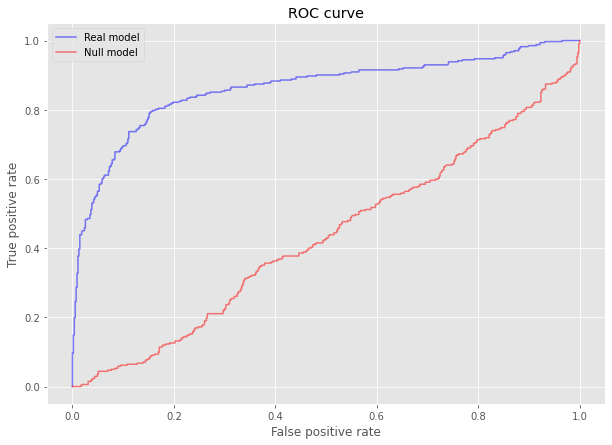

In [908]:
fpr, tpr, thresholds = roc_curve(targets, scores)
fpr_shuffled, tpr_shuffled, thresholds_shuffled = roc_curve(targets_shuffled, scores_shuffled)

fig, ax = plt.subplots(figsize = (10,7))
ax.set_title('ROC curve')
ax.plot(fpr, tpr, label='Real model', color='b', alpha=0.5)
ax.plot(fpr_shuffled, tpr_shuffled, label='Null model', color='r', alpha=0.5)
ax.set_xlabel('False positive rate') 
ax.set_ylabel('True positive rate')
plt.legend();

In [909]:
regLog = LogisticRegression() 
skf = StratifiedKFold(n_splits=10, shuffle=True) 
AUC, AUC_shuffled, pvalue = permutation_test_score(regLog, X, y, scoring="roc_auc", cv=skf, n_permutations=100)
print('Without shuffling: {}'.format(round(AUC, 4)))
print('Null model: {}'.format(round(AUC_shuffled.mean(), 4)))
print('p-value: {}'.format(pvalue))

Without shuffling: 0.8686
Null model: 0.4998
p-value: 0.009900990099009901


The model appears to be significantly better than random ($p-value < 0.05$).

We can visualize this in another way by plotting the distribution of the `AUC` obtained from the null model vs. the value obtained from the real model.

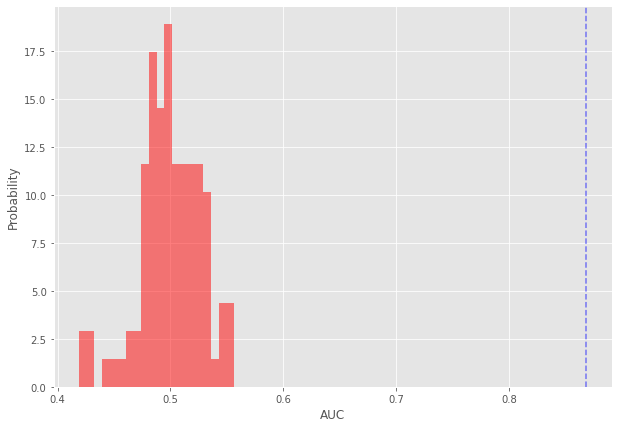

In [910]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(AUC_shuffled, bins=20, density=True, color='r', alpha=0.5) 
ax.axvline(AUC, ls='--', color='b', alpha=0.5) 
ax.set_xlabel("AUC") 
ax.set_ylabel("Probability");

### Feature selection



In [912]:
Kbest = 10 
random_state = 42
skf = StratifiedKFold(n_splits=10, shuffle=True)
skf.get_n_splits(X, y)

auc_values_fs =  []  
selected_features= np.array([]).reshape(0, X.shape[1]) 
X_1 = X.values

for train_index, test_index in skf.split(X_1, y): 
    
    train_X, test_X = X_1[train_index], X_1[test_index] 
    train_y, test_y = y[train_index], y[test_index]     

    scaler = MinMaxScaler() 
    train_X = scaler.fit_transform(train_X)

    scaler = MinMaxScaler() 
    test_X = scaler.fit_transform(test_X)

    selector = SelectKBest(k = Kbest) 
    # find the F scores
    selector.fit(train_X, train_y)
    # keep the top ranked features in the training set
    X_train_fs = selector.transform(train_X) 
    # keep the top ranked features in the testing set
    X_test_fs = selector.transform(test_X) 
    # this will set me True if the corresponding variable was selected and False otherwise
    features = np.array(selector.get_support()).reshape((1,-1))
    
    selected_features =  np.concatenate((selected_features,features), axis=0)
    # initialize model
    regLog = LogisticRegression(random_state = random_state) 
    # Fit model
    regLog.fit(X_train_fs, train_y)
    # predict
    probas_test = regLog.predict_proba(X_test_fs)  
    # evaluate
    fpr_test, tpr_test, thresholds_test = roc_curve(test_y, probas_test[:,1]) 
    auc_test = roc_auc_score(test_y, probas_test[:,1])
    auc_values_fs.append(auc_test)

print('The average AUC is: {}'.format(np.mean(auc_values_fs)))

The average AUC is: 0.8496202925614689


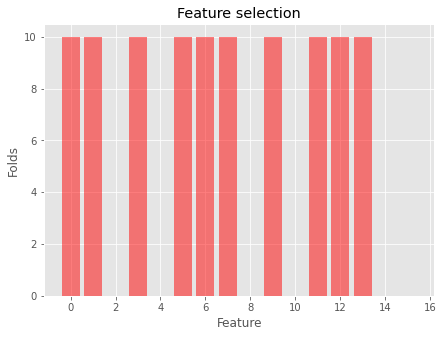

In [913]:
fig, ax = plt.subplots(figsize = (7, 5))
plt.bar(np.arange(0, X.shape[1]), np.sum(selected_features,axis=0), color='r', alpha=0.5)
plt.title('Feature selection')
plt.xlabel('Feature')
plt.ylabel('Folds');

We see that the average AUC obtained with the K=10 best features is not better than the AUC obtained with all. This means that in this dataset the classification is not based on a small set of very different features between the two classes, but they all seem to contribute.

### KNN

We analyze the change in the metrics as the number of neighbors increases, both in training and testing.

For this, we iterate on the `n_neighbors` parameter and observe how this impacts the metrics (`AUC`, `f1` and `balanced accuracy`).

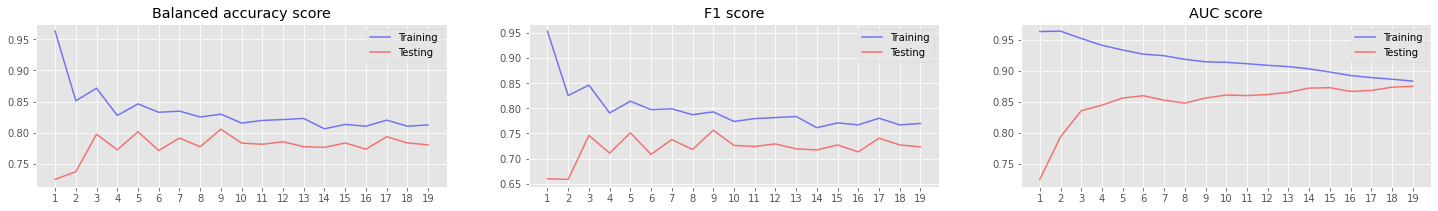

In [914]:
bal_acc_train, bal_acc_test = [], []
f1_train, f1_test = [], []
auc_train, auc_test = [], []
n_neighbors_list = range(1, 20, 1)

for k in n_neighbors_list:
    
    knn = KNeighborsClassifier(n_neighbors = k)
    # Fit model
    knn.fit(X_train, y_train)
    # Predict training
    y_pred_train = knn.predict(X_train)
    proba_train = knn.predict_proba(X_train)
    y_pred_test = knn.predict(X_test)
    proba_test = knn.predict_proba(X_test)
    # Metrics
    bal_acc_train.append(round(balanced_accuracy_score(y_train, y_pred_train), 4))
    bal_acc_test.append(round(balanced_accuracy_score(y_test, y_pred_test), 4))
    f1_train.append(round(f1_score(y_train, y_pred_train), 4))
    f1_test.append(round(f1_score(y_test, y_pred_test), 4))
    auc_train.append(round(roc_auc_score(y_train, proba_train[:,1]), 4)) 
    auc_test.append(round(roc_auc_score(y_test, proba_test[:,1]), 4))
    
# Plot    
fig = plt.figure(figsize=(25, 3))
ax1 = plt.subplot2grid((1,3),(0,0))
ax1.plot(n_neighbors_list, bal_acc_train, label='Training', color='b', alpha=0.5)
ax1.plot(n_neighbors_list, bal_acc_test, label='Testing', color='r', alpha=0.5)
ax1.set_xticks(n_neighbors_list)
ax2 = plt.subplot2grid((1,3),(0,1))
ax2.plot(n_neighbors_list, f1_train, label='Training', color='b', alpha=0.5)
ax2.plot(n_neighbors_list, f1_test, label='Testing', color='r', alpha=0.5)
ax2.set_xticks(n_neighbors_list)
ax3 = plt.subplot2grid((1,3),(0,2))
ax3.plot(n_neighbors_list, auc_train, label='Training', color='b', alpha=0.5)
ax3.plot(n_neighbors_list, auc_test, label='Testing', color='r', alpha=0.5)
ax3.set_xticks(n_neighbors_list)

ax1.title.set_text('Balanced accuracy score')
ax2.title.set_text('F1 score')
ax3.title.set_text('AUC score')
ax1.legend(loc="best")
ax2.legend(loc="best")
ax3.legend(loc="best")
plt.show()

Let's consider a model with 9 neighbors.

### Decision Tree

We are going to analyze the change in RMSE as the decision tree gets deeper, both in training and testing.

For this, we iterate on the `max_depth` parameter and observe how this impacts the metrics. 

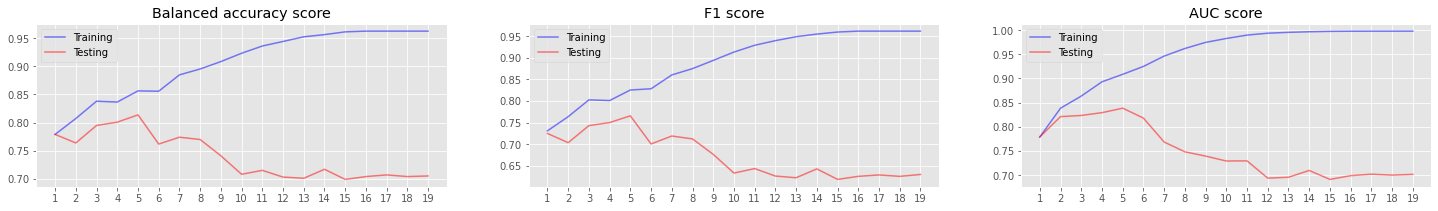

In [915]:
bal_acc_train, bal_acc_test = [], []
f1_train, f1_test = [], []
auc_train, auc_test = [], []
max_depth_list = range(1, 20, 1)

for x in max_depth_list:
    
    tree = DecisionTreeClassifier(max_depth= x)
    # Fit model
    tree.fit(X_train, y_train)
    # Predict training
    y_pred_train = tree.predict(X_train)
    proba_train = tree.predict_proba(X_train)
    y_pred_test = tree.predict(X_test)
    proba_test = tree.predict_proba(X_test)
    # Metrics
    bal_acc_train.append(round(balanced_accuracy_score(y_train, y_pred_train), 4))
    bal_acc_test.append(round(balanced_accuracy_score(y_test, y_pred_test), 4))
    f1_train.append(round(f1_score(y_train, y_pred_train), 4))
    f1_test.append(round(f1_score(y_test, y_pred_test), 4))
    auc_train.append(round(roc_auc_score(y_train, proba_train[:,1]), 4)) 
    auc_test.append(round(roc_auc_score(y_test, proba_test[:,1]), 4))
    
# Plot   
fig = plt.figure(figsize=(25, 3))
ax1 = plt.subplot2grid((1,3),(0,0))
ax1.plot(n_neighbors_list, bal_acc_train, label='Training', color='b', alpha=0.5)
ax1.plot(n_neighbors_list, bal_acc_test, label='Testing', color='r', alpha=0.5)
ax1.set_xticks(max_depth_list)
ax2 = plt.subplot2grid((1,3),(0,1))
ax2.plot(n_neighbors_list, f1_train, label='Training', color='b', alpha=0.5)
ax2.plot(n_neighbors_list, f1_test, label='Testing', color='r', alpha=0.5)
ax2.set_xticks(max_depth_list)
ax3 = plt.subplot2grid((1,3),(0,2))
ax3.plot(n_neighbors_list, auc_train, label='Training', color='b', alpha=0.5)
ax3.plot(n_neighbors_list, auc_test, label='Testing', color='r', alpha=0.5)
ax3.set_xticks(max_depth_list)

ax1.title.set_text('Balanced accuracy score')
ax2.title.set_text('F1 score')
ax3.title.set_text('AUC score')
ax1.legend(loc="best")
ax2.legend(loc="best")
ax3.legend(loc="best")
plt.show()

In [916]:
metrics_names = ['balanced_accuracy', 'f1', 'AUC']
classifiers = ['Logistic Regression','KNN','Decision Tree','Naive Bayes', 'SVM', 'MLP']
models = [LogisticRegression(),
          KNeighborsClassifier(n_neighbors = 9),
          DecisionTreeClassifier(max_depth= 3),
          GaussianNB(),
          svm.SVC(kernel='linear', probability=True),
          MLPClassifier()
         ]

metric_values = []
cm_values = []
fpr_values = []
tpr_values = []
threshold_values = []

for model in models:
    
    # fit model
    model.fit(X_train, y_train)
    # predict
    y_pred = model.predict(X_test)
    probas = model.predict_proba(X_test)
    # evaluate
    balanced_acc = round(balanced_accuracy_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    cm = confusion_matrix(y_pred, y_test) 
    auc = round(roc_auc_score(y_test, probas[:,1]), 4)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:,1])
    metric_values.append([balanced_acc, f1, auc])
    cm_values.append(cm)
    fpr_values.append(fpr)
    tpr_values.append(tpr)
    threshold_values.append(thresholds)
    
results_df = pd.DataFrame(metric_values, columns= metrics_names, index=classifiers)
results_df

,balanced_accuracy,f1,AUC
Logistic Regression,0.8136,0.7662,0.8641
KNN,0.8055,0.7565,0.8560
Decision Tree,0.7948,0.7429,0.8234
Naive Bayes,0.6623,0.5200,0.8027
SVM,0.7865,0.7320,0.8365
MLP,0.7725,0.7128,0.8610


### Confusion matrix

![title](img/cm.png)


* **True Positives (TP):** we correctly predicted that they do survive 
* **True Negatives (TN):** we correctly predicted that they don't survive 
* **False Positives (FP):** we incorrectly predicted that they do survive (a "Type I error")
* **False Negatives (FN):** we incorrectly predicted that they don't survive (a "Type II error")

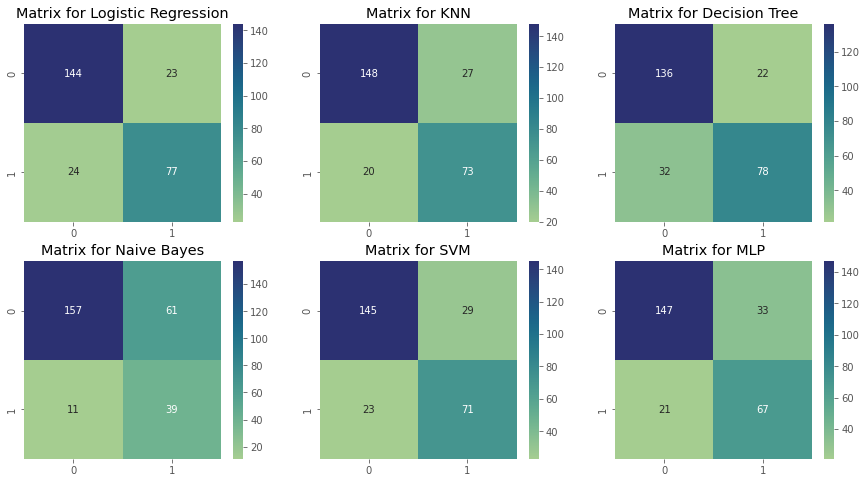

In [917]:
f,ax=plt.subplots(2, 3, figsize=(15,8))
sns.heatmap(cm_values[0],ax=ax[0,0],annot=True,fmt='2.0f', cmap=cmap)
ax[0,0].set_title('Matrix for Logistic Regression')
sns.heatmap(cm_values[1],ax=ax[0,1],annot=True,fmt='2.0f', cmap=cmap)
ax[0,1].set_title('Matrix for KNN')
sns.heatmap(cm_values[2],ax=ax[0,2],annot=True,fmt='2.0f', cmap=cmap)
ax[0,2].set_title('Matrix for Decision Tree')
sns.heatmap(cm_values[3],ax=ax[1,0],annot=True,fmt='2.0f', cmap=cmap)
ax[1,0].set_title('Matrix for Naive Bayes')
sns.heatmap(cm_values[4],ax=ax[1,1],annot=True,fmt='2.0f', cmap=cmap)
ax[1,1].set_title('Matrix for SVM')
sns.heatmap(cm_values[5],ax=ax[1,2],annot=True,fmt='2.0f', cmap=cmap)
ax[1,2].set_title('Matrix for MLP');

### Cross Validation


<img src="img/StratifiedKFold.png" alt="drawing" width="500"/>

In [918]:
# Cross validate model with Kfold stratified cross val
skf = StratifiedKFold(n_splits=10, shuffle=True) 
skf.get_n_splits(X, y) 

X_1 = X.values
auc_scores, bal_acc_scores, f1_scores = [], [], []
auc_mean, bal_acc_mean, f1_mean = [], [], []
auc_std, bal_acc_std, f1_std = [], [], []

for model, name in zip(models, classifiers):

    auc_values = [] 
    bal_acc_values = []
    f1_values = []
    
    for train_index, test_index in skf.split(X_1, y): 
        
        train_X, test_X = X_1[train_index], X_1[test_index]
        train_y, test_y = y[train_index], y[test_index] 
        
        scaler = MinMaxScaler() 
        train_X = scaler.fit_transform(train_X)

        scaler = MinMaxScaler() 
        test_X = scaler.fit_transform(test_X)

        # fit model
        model.fit(train_X, train_y) 
        # predict
        y_pred = model.predict(test_X)
        # predict prob
        proba_test = model.predict_proba(test_X) 
        # evaluate
        auc = round(roc_auc_score(test_y, proba_test[:,1]), 4) 
        bal_acc = round(balanced_accuracy_score(test_y, y_pred), 4)
        f1 = round(f1_score(test_y, y_pred), 4)
        # save results
        auc_values.append(auc)
        bal_acc_values.append(bal_acc)
        f1_values.append(f1)

    auc_scores.append(auc_values)
    auc_mean.append(np.mean(auc_values))
    auc_std.append(np.std(auc_values))
    bal_acc_scores.append(bal_acc_values)
    bal_acc_mean.append(np.mean(bal_acc_values))
    bal_acc_std.append(np.std(bal_acc_values))
    f1_scores.append(f1_values)
    f1_mean.append(np.mean(f1_values))
    f1_std.append(np.std(f1_values))
    
cv_results_df = pd.DataFrame({'auc_mean':auc_mean, 'auc_std':auc_std,
                              'bal_acc_mean': bal_acc_mean, 'bal_acc_std': bal_acc_std,
                              'f1_mean': f1_mean, 'f1_std': f1_std}, index=classifiers)    

cv_results_df = cv_results_df.reset_index().rename(columns={'index':'model'}) 

In [919]:
cv_results_df

,model,auc_mean,auc_std,bal_acc_mean,bal_acc_std,f1_mean,f1_std
0,Logistic Regression,0.86667,0.025850,0.80079,0.038160,0.75419,0.049035
1,KNN,0.85701,0.046233,0.79680,0.035672,0.74770,0.047845
2,Decision Tree,0.84102,0.036111,0.80447,0.049714,0.75765,0.060726
3,Naive Bayes,0.83814,0.048477,0.77810,0.067307,0.71663,0.104965
4,SVM,0.84944,0.030159,0.79521,0.028514,0.74507,0.038494
5,MLP,0.86974,0.031683,0.81313,0.036893,0.76947,0.048606


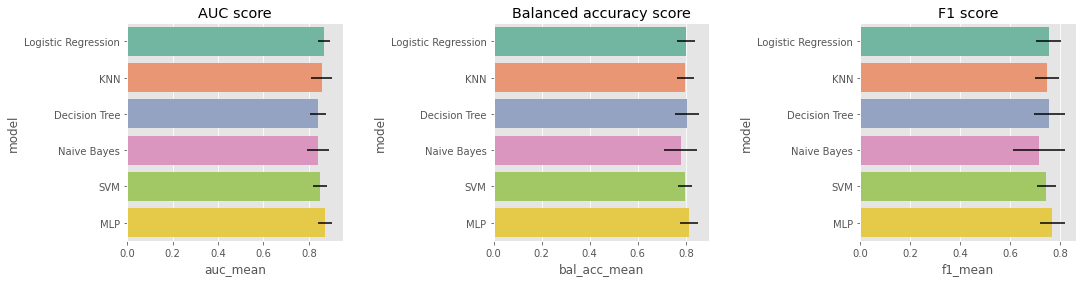

In [920]:
# Plot   
fig = plt.figure(figsize=(17, 4))
fig.subplots_adjust(wspace=0.7) 
ax1 = plt.subplot2grid((1,3),(0,0))
sns.barplot("auc_mean", "model", data = cv_results_df, palette=palette, orient = "h",**{'xerr':auc_std})
ax2 = plt.subplot2grid((1,3),(0,1))
sns.barplot("bal_acc_mean", "model", data = cv_results_df, palette=palette, orient = "h",**{'xerr': bal_acc_std})
ax3 = plt.subplot2grid((1,3),(0,2))
sns.barplot("f1_mean", "model", data = cv_results_df, palette=palette, orient = "h",**{'xerr': f1_std})
ax1.title.set_text('AUC score')
ax2.title.set_text('Balanced accuracy score')
ax3.title.set_text('F1 score');

## ⚙️ Hyperparameter Tuning


### Logistic Regression

In [804]:
# Look at the various parameters
# help(LogisticRegression)

In [921]:
%%time
# Create the grids
logreg_param_grid = {"C": np.logspace(-3, 3, 7),
                     "penalty": ["l1", "l2"]}

# Set the random_state to 42 for reproducibility
# Random_state is used to set the seed for the random generator so that we can ensure that the results that we get can be reproduced. 
random_state = 42
log_clf = GridSearchCV(estimator = LogisticRegression(random_state = random_state),
                          param_grid = logreg_param_grid,
                          cv = StratifiedKFold(n_splits = 10),
                          scoring = "roc_auc",
                          n_jobs = -1, # let's grid search run on all of the available cores on the host machine
                          verbose = 1)
    
log_clf.fit(X, y)
print('-----------Logistic Regression results-----------')
print('Best score: {}'.format(log_clf.best_score_))
print('Best model: {}'.format(log_clf.best_estimator_))
print('Best params: {}'.format(log_clf.best_params_))

Fitting 10 folds for each of 14 candidates, totalling 140 fits
-----------Logistic Regression results-----------
Best score: 0.8746198681492799
Best model: LogisticRegression(random_state=42)
Best params: {'C': 1.0, 'penalty': 'l2'}
CPU times: user 375 ms, sys: 446 ms, total: 821 ms
Wall time: 1.44 s


### Support Vector Machines

In [922]:
# help(svm.SVC)

In [923]:
%%time
# Create the grids
svm_param_grid = {'kernel': ['rbf','linear'],
                  'C': [0.05, 0.1, 0.25, 0.5, 0.75, 1],
                  'gamma': [0.05, 0.1, 0.25, 0.5, 0.75, 1]}

svm_clf = GridSearchCV(estimator = svm.SVC(random_state = random_state, probability = True),
                          param_grid = svm_param_grid,
                          cv = StratifiedKFold(n_splits = 10),
                          scoring = "roc_auc",
                          n_jobs = -1, # let's grid search run on all of the available cores on the host machine
                          verbose = 1)
    
svm_clf.fit(X, y)
print('-----------Support Vector Machines results-----------')
print('Best score: {}'.format(svm_clf.best_score_))
print('Best model: {}'.format(svm_clf.best_estimator_))
print('Best params: {}'.format(svm_clf.best_params_))

Fitting 10 folds for each of 72 candidates, totalling 720 fits
-----------Support Vector Machines results-----------
Best score: 0.8593611464787934
Best model: SVC(C=0.25, gamma=0.05, kernel='linear', probability=True, random_state=42)
Best params: {'C': 0.25, 'gamma': 0.05, 'kernel': 'linear'}
CPU times: user 986 ms, sys: 0 ns, total: 986 ms
Wall time: 12.6 s


### Multilyer Perceptron

In [924]:
%%time
# Create the grids
mlp_param_grid = {'hidden_layer_sizes': [(10,), (50,), (100,)],
                  'activation': ['relu', 'tanh', 'logistic'],
                  'learning_rate': ['constant', 'invscaling', 'adaptive']}

mlp_clf = GridSearchCV(estimator = MLPClassifier(random_state = random_state),
                          param_grid = mlp_param_grid,
                          cv = StratifiedKFold(n_splits = 10),
                          scoring = "roc_auc",
                          n_jobs = -1, # let's grid search run on all of the available cores on the host machine
                          verbose = 1)
    
mlp_clf.fit(X, y)
print('-----------Multilyer Perceptron results-----------')
print('Best score: {}'.format(mlp_clf.best_score_))
print('Best model: {}'.format(mlp_clf.best_estimator_))
print('Best params: {}'.format(mlp_clf.best_params_))

Fitting 10 folds for each of 27 candidates, totalling 270 fits
-----------Multilyer Perceptron results-----------
Best score: 0.8707573776985541
Best model: MLPClassifier(activation='tanh', random_state=42)
Best params: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
CPU times: user 7.33 s, sys: 15.8 s, total: 23.1 s
Wall time: 14.1 s


## Ensemble

*Wisdom of the crowd*


<img src="img/ensemble.png" alt="drawing" width="500"/>


Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal predictive model with reduced variance (using bagging), bias (using boosting) and improved predictions (using stacking).

* **Bagging** (from Bootstrap AGGregatING) involves using a single machine learning algorithm, almost always an unpruned decision tree, and training each model on a different sample of the same training dataset. The predictions made by the ensemble members are then combined using simple statistics, such as voting or averaging. 

    Examples (rows) are drawn from the dataset at random, although with replacement. Replacement means that if a row is selected, it is returned to the training dataset for potential re-selection in the same training dataset. This means that a row of data may be selected zero, one, or multiple times for a given training dataset.

    Many popular ensemble algorithms are based on this approach, including:

    * Bagged Decision Trees (canonical bagging)
    * Random Forest
    * Extra Trees


* **Stacking** involves fitting many different models types on the same data and using another model to learn how to best combine the predictions. 
* **Boosting** involves adding ensemble members sequentially that correct the predictions made by prior models and outputs a weighted average of the predictions.

    The key property of boosting ensembles is the idea of correcting prediction errors. The models are fit and added to the ensemble sequentially such that the second model attempts to correct the predictions of the first model, the third corrects the second model, and so on.

    Many popular ensemble algorithms are based on this approach, including:
     * AdaBoost (canonical boosting)
     * Gradient Boosting Machines
     * Stochastic Gradient Boosting (XGBoost and similar)

### Bagging



#### Random Forest

In [925]:
# help(RandomForestClassifier)

In [926]:
%%time
# Create the grids
forest_param_grid = {'bootstrap': [True, False], # sample with replacement
                     'max_depth': [5, 10, None], # how deep each tree grows
                     'max_features': [5, 8, 10, None], # number of features at each node
                     'min_samples_leaf': [1, 2, 3], # size of the leaves in the trees
                     'min_samples_split': [2, 5, 10],
                     'criterion': ['gini','entropy'],
                     'n_estimators': [10, 100]} # number of trees in the forest

rf_clf = GridSearchCV(estimator = RandomForestClassifier(random_state = random_state),
                          param_grid = forest_param_grid,
                          cv = StratifiedKFold(n_splits = 10),
                          scoring = "roc_auc",
                          n_jobs = -1, # let's grid search run on all of the available cores on the host machine
                          verbose = 1)
    
rf_clf.fit(X, y)
print('-----------Random Forest results-----------')
print('Best score: {}'.format(rf_clf.best_score_))
print('Best model: {}'.format(rf_clf.best_estimator_))
print('Best params: {}'.format(rf_clf.best_params_))

Fitting 10 folds for each of 864 candidates, totalling 8640 fits
-----------Random Forest results-----------
Best score: 0.88000481000481
Best model: RandomForestClassifier(criterion='entropy', max_depth=5, max_features=8,
                       min_samples_leaf=3, n_estimators=10, random_state=42)
Best params: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 10}
CPU times: user 10.8 s, sys: 1.04 s, total: 11.9 s
Wall time: 1min 16s


#### Bagging Classifier

In [927]:
# help(BaggingClassifier)

In [928]:
%%time
# Create the grids
bagging_param_grid = {'n_estimators': [40, 42],
                      'base_estimator__max_leaf_nodes': [10, 15],
                      'base_estimator__max_depth':[4, 5, 6]}

bagg_clf = GridSearchCV(estimator = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state = random_state),
                          param_grid = bagging_param_grid,
                          cv = StratifiedKFold(n_splits = 10),
                          scoring = "roc_auc",
                          n_jobs = -1, # let's grid search run on all of the available cores on the host machine
                          verbose = 1)
    
bagg_clf.fit(X, y)
print('-----------Bagging Classifier results-----------')
print('Best score: {}'.format(bagg_clf.best_score_))
print('Best model: {}'.format(bagg_clf.best_estimator_))
print('Best params: {}'.format(bagg_clf.best_params_))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
-----------Bagging Classifier results-----------
Best score: 0.8718294711824124
Best model: BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        max_leaf_nodes=10),
                  n_estimators=42, random_state=42)
Best params: {'base_estimator__max_depth': 5, 'base_estimator__max_leaf_nodes': 10, 'n_estimators': 42}
CPU times: user 235 ms, sys: 10.5 ms, total: 246 ms
Wall time: 981 ms


#### Extra Tree Classifier

In [929]:
# help(ExtraTreesClassifier)

In [930]:
%%time
# Create the grids
extra_tree_param_grid = {"max_depth": [None],
                         "max_features": [1, 3, 10],
                         "min_samples_split": [2, 3, 10],
                         "min_samples_leaf": [1, 3, 10],
                         "bootstrap": [True, False],
                         "n_estimators" :[10, 100],
                         "criterion": ['gini', 'entropy']}

extra_clf = GridSearchCV(estimator = ExtraTreesClassifier(random_state = random_state),
                          param_grid = extra_tree_param_grid,
                          cv = StratifiedKFold(n_splits = 10),
                          scoring = "roc_auc",
                          n_jobs = -1, # let's grid search run on all of the available cores on the host machine
                          verbose = 1)
    
extra_clf.fit(X, y)
print('-----------Extra Tree Classifier results-----------')
print('Best score: {}'.format(extra_clf.best_score_))
print('Best model: {}'.format(extra_clf.best_estimator_))
print('Best params: {}'.format(extra_clf.best_params_))

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
-----------Extra Tree Classifier results-----------
Best score: 0.8788144186967717
Best model: ExtraTreesClassifier(bootstrap=True, max_features=10, min_samples_leaf=3,
                     n_estimators=10, random_state=42)
Best params: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 10}
CPU times: user 2.7 s, sys: 140 ms, total: 2.84 s
Wall time: 15.7 s


### Boosting

#### Ada Boost

In [931]:
# help(AdaBoostClassifier)

In [932]:
%%time
# Create the grids
ada_param_grid = {'n_estimators': [100, 200, 300, 400],
                  'learning_rate': [0.1, 0.05, 0.01,0.001]
                 }

ada_clf = GridSearchCV(estimator = AdaBoostClassifier(random_state = random_state),
                          param_grid = ada_param_grid,
                          cv = StratifiedKFold(n_splits = 10),
                          scoring = "roc_auc",
                          n_jobs = -1, # let's grid search run on all of the available cores on the host machine
                          verbose = 1)
    
ada_clf.fit(X, y)
print('-----------Ada Boost Classifier results-----------')
print('Best score: {}'.format(ada_clf.best_score_))
print('Best model: {}'.format(ada_clf.best_estimator_))
print('Best params: {}'.format(ada_clf.best_params_))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
-----------Ada Boost Classifier results-----------
Best score: 0.8717968197379962
Best model: AdaBoostClassifier(learning_rate=0.05, n_estimators=200, random_state=42)
Best params: {'learning_rate': 0.05, 'n_estimators': 200}
CPU times: user 511 ms, sys: 9.15 ms, total: 520 ms
Wall time: 6.33 s


#### Gradient Boosting

In [933]:
# help(GradientBoostingClassifier)

In [934]:
%%time
# Create the grids
grad_param_grid = {'loss' : ["deviance"],
                   'n_estimators' : [100, 200, 300, 400],
                   'learning_rate': [0.1, 0.05, 0.01,0.001],
                   'max_depth': [4, 8],
                   'min_samples_leaf': [100, 150],
                   'max_features': [0.3, 0.2,0.1] 
                  }

grad_clf = GridSearchCV(estimator = GradientBoostingClassifier(random_state = random_state),
                          param_grid = ada_param_grid,
                          cv = StratifiedKFold(n_splits = 10),
                          scoring = "roc_auc",
                          n_jobs = -1, # let's grid search run on all of the available cores on the host machine
                          verbose = 1)
    
grad_clf.fit(X, y)
print('-----------Gradient Boosting Classifier results-----------')
print('Best score: {}'.format(grad_clf.best_score_))
print('Best model: {}'.format(grad_clf.best_estimator_))
print('Best params: {}'.format(grad_clf.best_params_))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
-----------Gradient Boosting Classifier results-----------
Best score: 0.8781635401635401
Best model: GradientBoostingClassifier(random_state=42)
Best params: {'learning_rate': 0.1, 'n_estimators': 100}
CPU times: user 289 ms, sys: 0 ns, total: 289 ms
Wall time: 3.69 s


### Voting

We choosed a voting classifier to combine the predictions coming from the best 4 classifiers.

In [958]:
# Voting Classifier

best_lg = log_clf.best_estimator_
best_rf = rf_clf.best_estimator_
best_bagg = bagg_clf.best_estimator_
best_extra = extra_clf.best_estimator_
best_ada = ada_clf.best_estimator_
best_grad = grad_clf.best_estimator_

estimators = [
              ('Logistic Regression', best_lg),
              #('Multilyer Perceptron', mlp_clf.best_estimator_),
              ('Random Forest', best_rf),
              #('Bagging', best_bagg),
              ('Extra Tree', best_extra),
              #('Ada Boost', best_ada),
              ('Gradient Boosting', best_grad)
             ]
voting = VotingClassifier(estimators = estimators,
                          voting = "soft", # Hard voting classifier classifies input data based on the mode
                                           # of all the predictions made by different classifiers while 
                                           # soft voting classifier classifies based on the probabilities
                          n_jobs = -1)
voting = voting.fit(X_train, y_train)
# predict
y_pred_prob = voting.predict_proba(X_test) 
# evaluate
auc = round(roc_auc_score(y_test, y_pred_prob[:,1]), 4)
print('The metric for Voting Classifier model is: {}'.format(auc))

The metric for Voting Classifier model is: 0.883


## Feature importance

Let's see the important features for some classifiers.

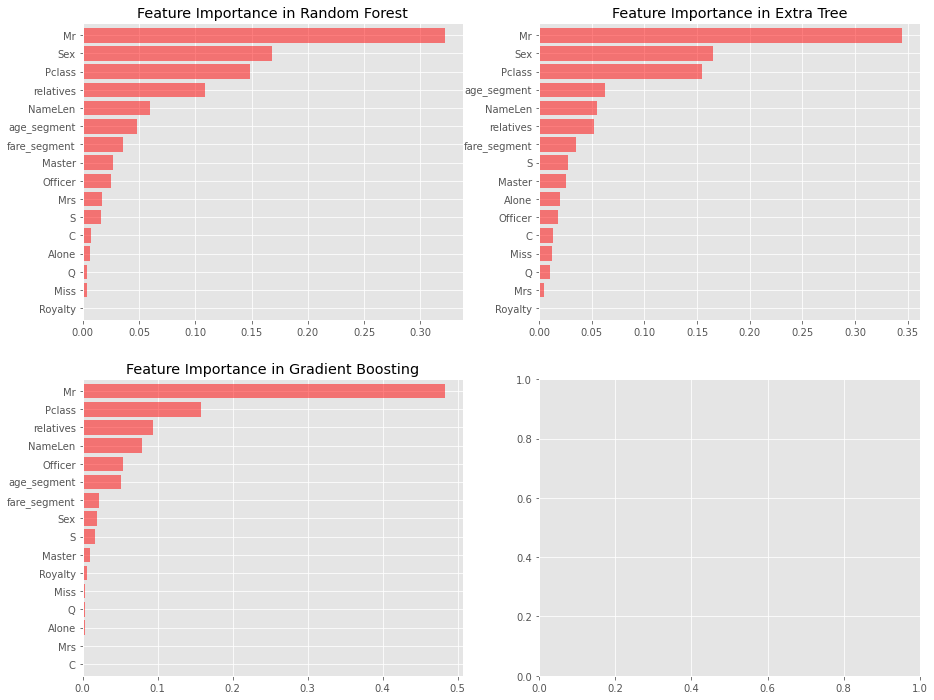

In [959]:
f, ax = plt.subplots(2, 2, figsize=(15,12))
model = best_rf
model.fit(X,y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0], color='r', alpha=0.5)
ax[0,0].set_title('Feature Importance in Random Forest')
model = best_extra
model.fit(X,y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='r', alpha=0.5)
ax[0,1].set_title('Feature Importance in Extra Tree')
model =  best_grad
model.fit(X,y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], color='r', alpha=0.5)
ax[1,0].set_title('Feature Importance in Gradient Boosting');

## 📝 Conclusion 

* Some of the common important features are `Mr`, `Sex`, `Pclass`, `relatives`.
* The maximum AUC ROC we can get is `88.3%` (with the Voting classifier).

## References

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
* https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/

# End
---